In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [49]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Load Dataset

This dataset contain electricty usage in Germany office. Range from 2006 - 2017

In [50]:
df = pd.read_csv(r'/content/drive/Othercomputers/My Laptop/PYTHON DATA SCIENCE/PURWADHIKA DATA SCIENCE/PURWADHIKA SESSION PRACTICE/Machine Learning/Materi web/10. Time Series/opsd_germany_daily.csv')
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


# Checking missing value

In [52]:
df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

# Change date data type to datetime

In [53]:
df['Date'] = pd.to_datetime(df['Date'])

# Select "Date" and "Consumption" as feature to use & set month as index period

In [54]:
df_new = df[['Date','Consumption']].set_index('Date')
df_new = df_new['Consumption'].resample('MS').mean()
df_new

Date
2006-01-01    1461.442065
2006-02-01    1467.106893
2006-03-01    1418.649161
2006-04-01    1275.058900
2006-05-01    1253.488484
                 ...     
2017-08-01    1291.283022
2017-09-01    1335.952031
2017-10-01    1366.297385
2017-11-01    1477.990818
2017-12-01    1435.842075
Freq: MS, Name: Consumption, Length: 144, dtype: float64

# Showing consumption usage in line plot

Text(0, 0.5, 'Consumption')

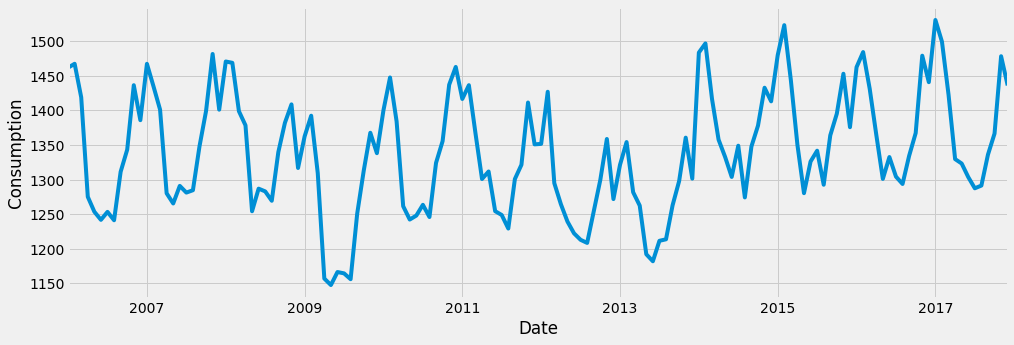

In [55]:
df_new.plot(figsize=(15,5))
plt.ylabel('Consumption')

From the plot above we can see consumption data has seasonal time series, so we use SARIMAX as model.

# Decomposition plot

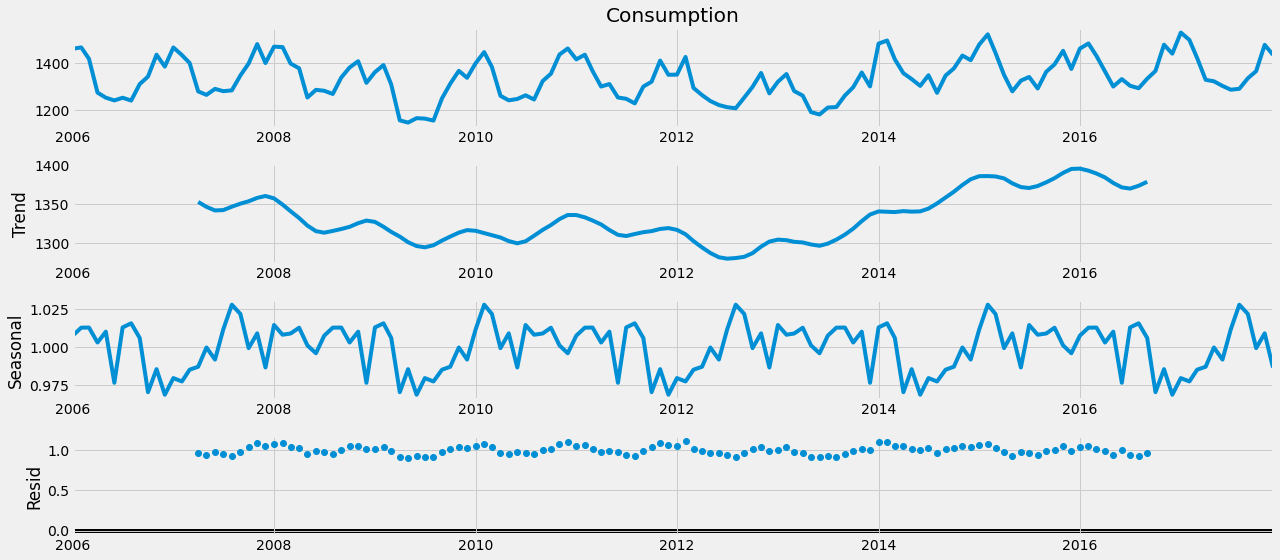

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_new, model='multiplicable', period = 30)
fig = decomposition.plot()
plt.show()

# Parameter combination for the SARIMAX time series model

In [57]:
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Find the lowest AIC from parameter combination

In [58]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_new,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2467.407199386189
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2108.8084604829996
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1457.530520982936
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1307.2545340511156
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1469.4340476744637
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1428.709442728425
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1334.35251406455
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1308.6763732685854
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2268.964455094328
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1929.7672650971774
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1382.9374361829373
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1238.3236943083707
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1404.895465899031
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1354.8631220905108
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1275.835776326213
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1240.2786116483917
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1566.0250031451467
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1379.135673720752
A

# Fitting SARIMAX time series model

In [59]:
mod = sm.tsa.statespace.SARIMAX(df_new,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Consumption   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -576.805
Date:                            Mon, 22 Aug 2022   AIC                           1161.610
Time:                                    12:11:20   BIC                           1172.659
Sample:                                01-01-2006   HQIC                          1166.096
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0085      0.268      0.032      0.975      -0.516       0.533
ma.L1         -0.4338      0.265   

# Diagnostic Plot

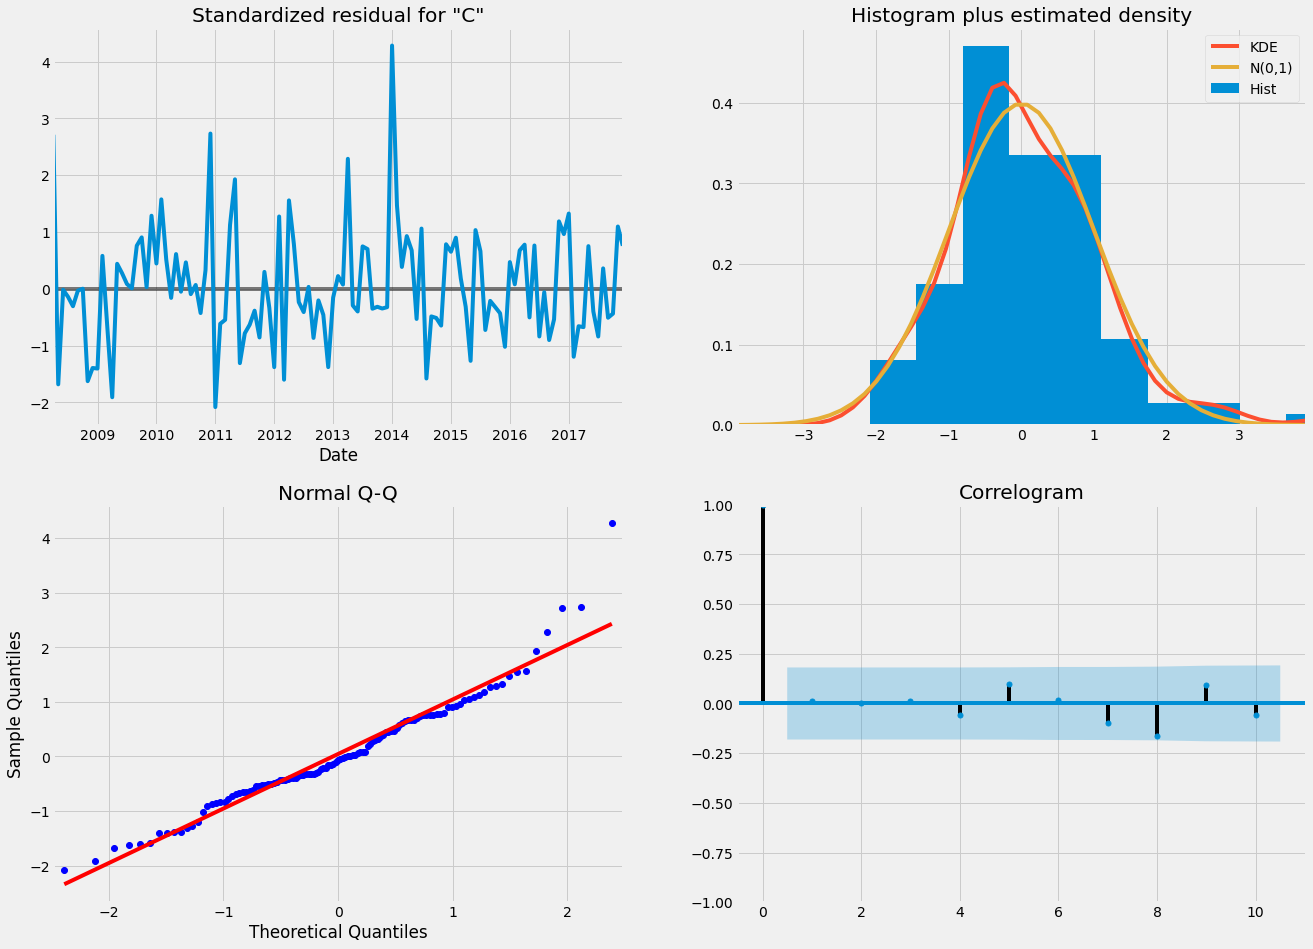

In [60]:
results.plot_diagnostics(figsize=(20,15))
plt.show()

# Forecast based on histories

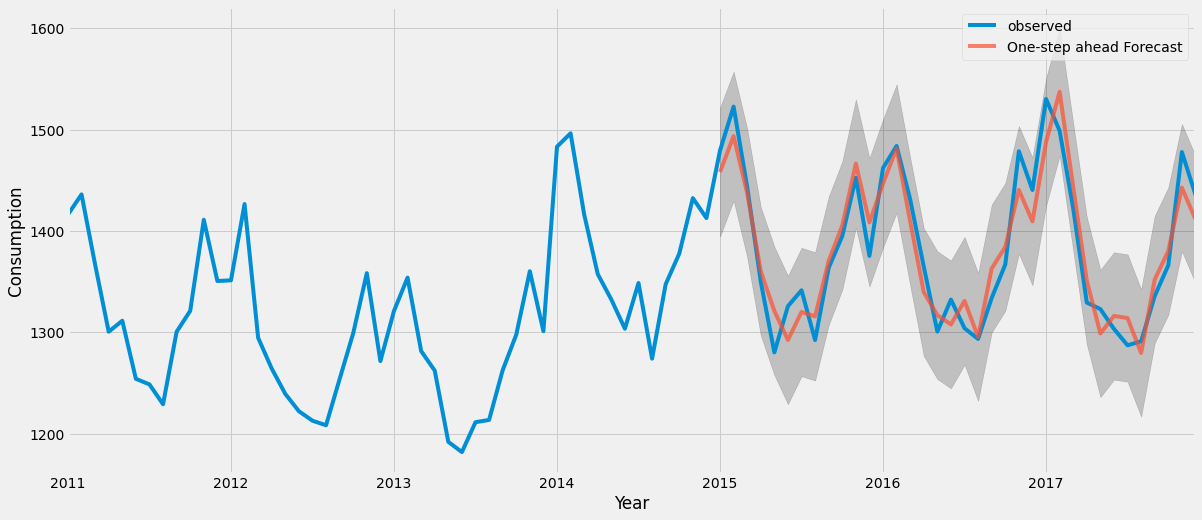

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df_new['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Year')
ax.set_ylabel('Consumption')
plt.legend()

plt.show()

# Calculating MSE for dynamic=False forecast

In [72]:
df_new_forecasted = pred.predicted_mean
df_new_truth = df_new['2015-01-01':]

# Compute the mean square error
mse = ((df_new_forecasted - df_new_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 590.64


# Forecast based on previous forecasted time points

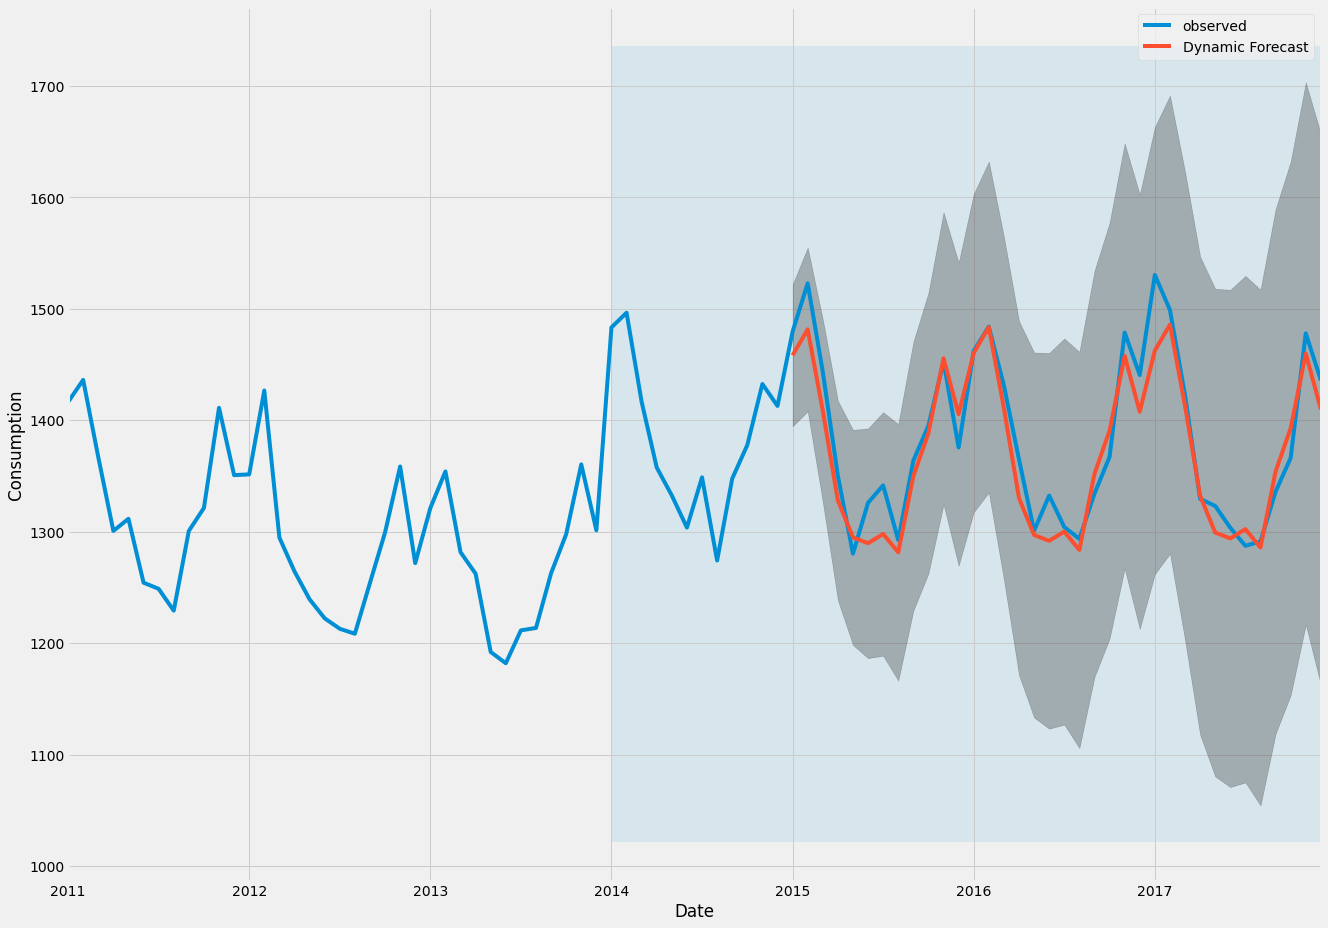

In [69]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = df_new['2011':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-01-01'), df_new.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Consumption')

plt.legend()
plt.show()

# Calculating MSE for dynamic=True forecast

In [73]:
df_new_forecasted = pred_dynamic.predicted_mean
df_new_truth = df_new['2015-01-01':]

# Compute the mean square error
mse = ((df_new_forecasted - df_new_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 616.66


# Producing and Visualizing Forecast

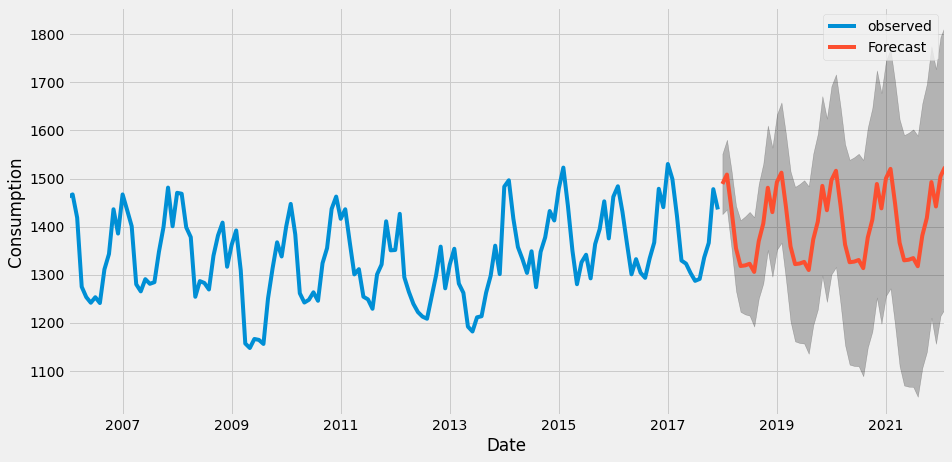

In [71]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df_new.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Consumption')
plt.legend()
plt.show()

# Forecast value

In [65]:
pred_uc.predicted_mean

2018-01-01    1488.834379
2018-02-01    1508.371390
2018-03-01    1436.440175
2018-04-01    1354.833911
2018-05-01    1318.174802
2018-06-01    1319.418195
2018-07-01    1322.805984
2018-08-01    1305.877237
2018-09-01    1369.717876
2018-10-01    1406.519750
2018-11-01    1480.879441
2018-12-01    1430.215924
2019-01-01    1492.690015
2019-02-01    1512.307599
2019-03-01    1440.377069
2019-04-01    1358.770811
2019-05-01    1322.111701
2019-06-01    1323.355094
2019-07-01    1326.742884
2019-08-01    1309.814137
2019-09-01    1373.654775
2019-10-01    1410.456650
2019-11-01    1484.816341
2019-12-01    1434.152824
2020-01-01    1496.626915
2020-02-01    1516.244499
2020-03-01    1444.313968
2020-04-01    1362.707710
2020-05-01    1326.048601
2020-06-01    1327.291994
2020-07-01    1330.679783
2020-08-01    1313.751036
2020-09-01    1377.591675
2020-10-01    1414.393549
2020-11-01    1488.753241
2020-12-01    1438.089724
2021-01-01    1500.563814
2021-02-01    1520.181398
2021-03-01  

In [66]:
pred_ci

,lower Consumption,upper Consumption
2018-01-01,1426.034411,1551.634348
2018-02-01,1435.971298,1580.771483
2018-03-01,1355.691956,1517.188394
2018-04-01,1266.525295,1443.142528
2018-05-01,1222.903896,1413.445708
2018-06-01,1217.660250,1421.176139
2018-07-01,1214.950465,1430.661503
2018-08-01,1192.250890,1419.503584
2018-09-01,1250.599949,1488.835803
2018-10-01,1282.152494,1530.887006
